<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Shoping_Mall_Customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Customer segmentation is the process of dividinng customers of a company into groups(Clusters) to help
the company adjust the sale and marketing strategies based on each cluster behavior ,and hence maximize the business profit
Segmentation factors :
 Demographic(Age,gender,income)
 Psychographic(Interest,Lifestyle)
 Behavioral(Spending habits,brand interactions)
 Geographic (zip code,country)
"""
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import io

In [ ]:
uploaded=files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
cust_data=pd.read_csv(io.BytesIO(uploaded["Mall_Customers.csv"]))

In [ ]:
#EDA

cust_data.shape

(200, 5)

In [ ]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
cust_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
cust_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
cust_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

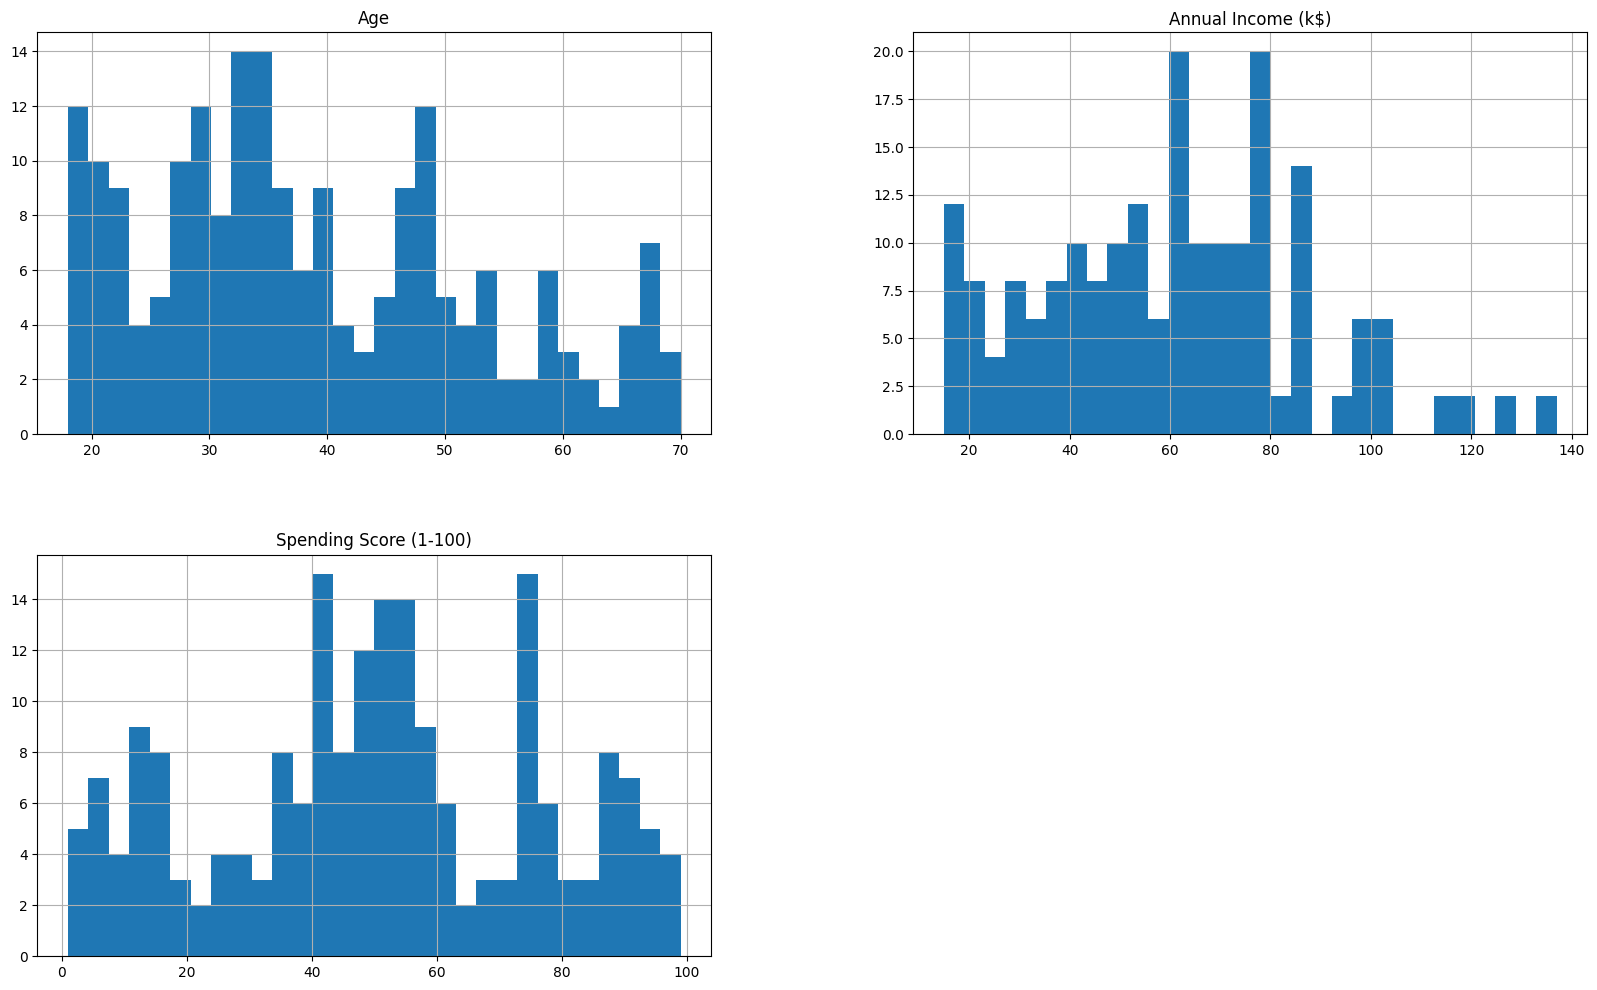

In [ ]:
#Plots
cust_data.drop('CustomerID',axis=1).hist(bins=30,figsize=(20,12))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

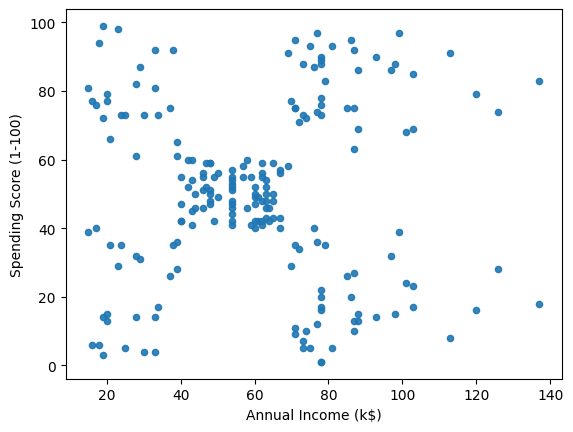

In [ ]:
#Age vs income
cust_data.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',alpha=0.9)

<Axes: xlabel='count', ylabel='Gender'>

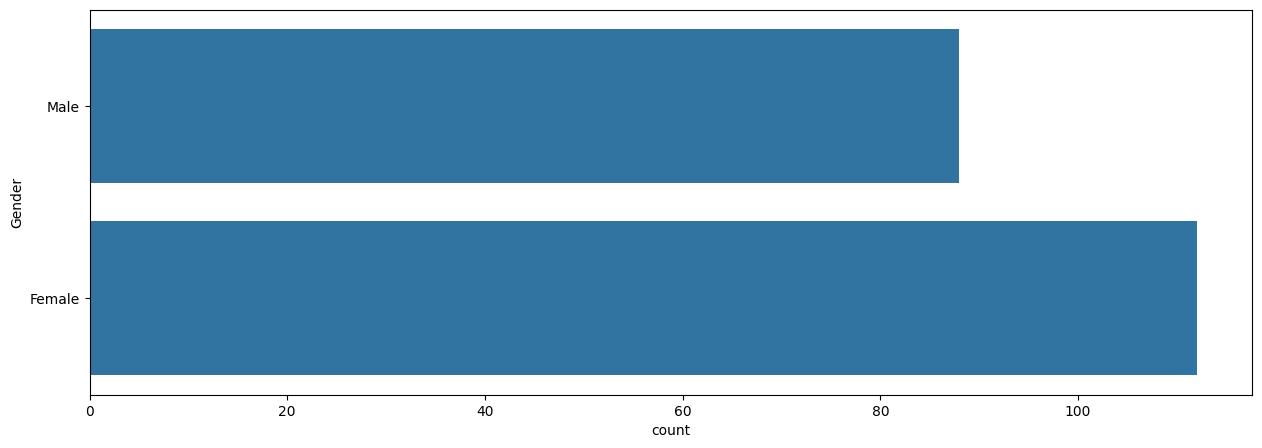

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=cust_data)

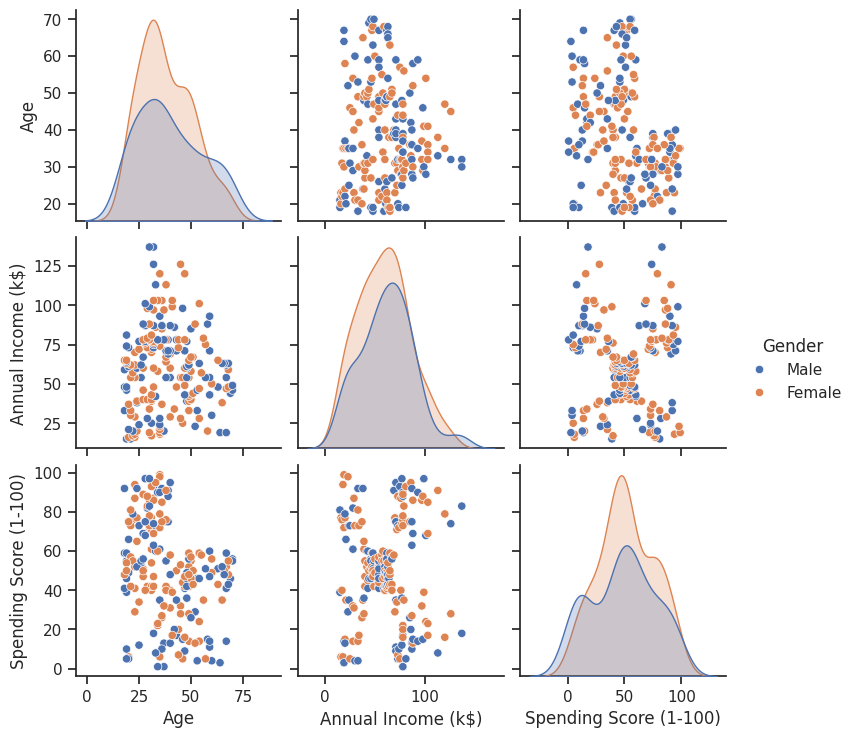

In [ ]:
sns.set(style="ticks")
sns.pairplot(cust_data.drop('CustomerID',axis=1),hue='Gender')
plt.show()

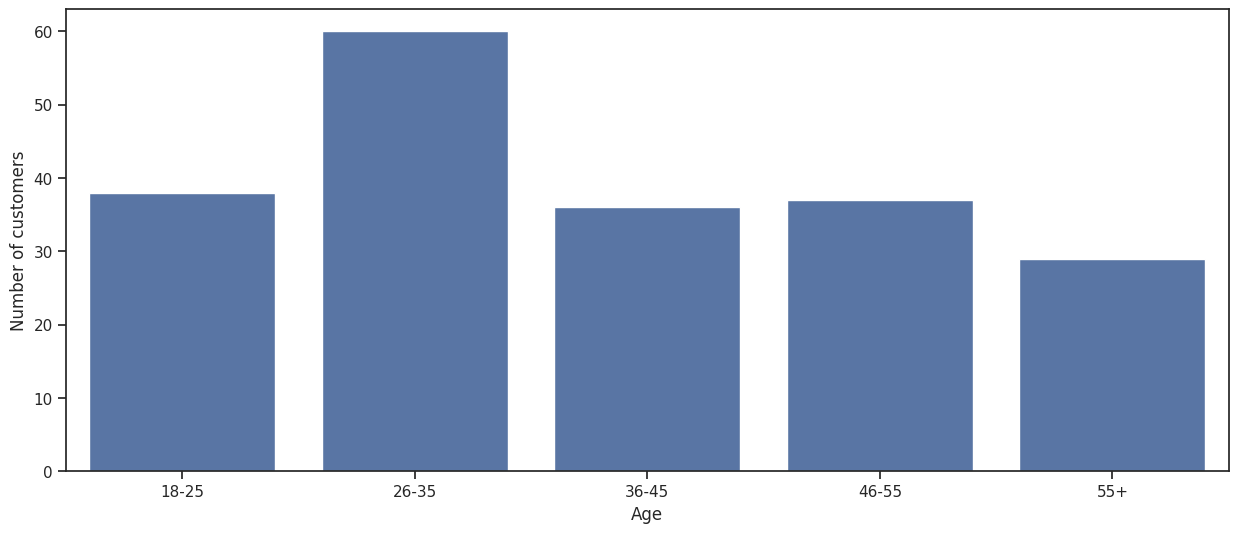

In [ ]:
age_18_25=cust_data.Age[(cust_data.Age>=18)&(cust_data.Age<=25)]
age_26_35=cust_data.Age[(cust_data.Age>=26)&(cust_data.Age<=35)]
age_36_45=cust_data.Age[(cust_data.Age>=36)&(cust_data.Age<=45)]
age_46_55=cust_data.Age[(cust_data.Age>=46)&(cust_data.Age<=55)]
age_55_above=cust_data.Age[(cust_data.Age>=56)]
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

<ipython-input-16-bd7a5253d0ed>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ss_x,y=ss_y,palette="rocket")


Text(0, 0.5, 'Number of customers')

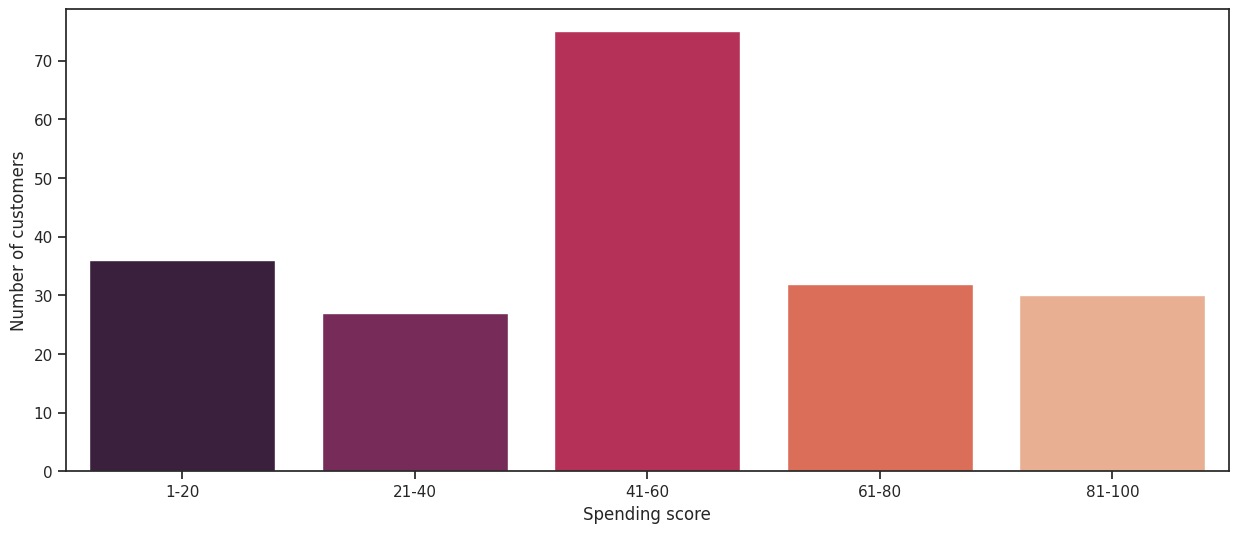

In [ ]:
ss_1_20=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=1)&(cust_data["Spending Score (1-100)"]<=20)]
ss_21_40=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=21)&(cust_data["Spending Score (1-100)"]<=40)]
ss_41_60=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=41)&(cust_data["Spending Score (1-100)"]<=60)]
ss_61_80=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=61)&(cust_data["Spending Score (1-100)"]<=80)]
ss_81_100=cust_data["Spending Score (1-100)"][(cust_data["Spending Score (1-100)"]>=81)&(cust_data["Spending Score (1-100)"]<=100)]
ss_x=["1-20","21-40","41-60","61-80","81-100"]
ss_y=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ss_x,y=ss_y,palette="rocket")
plt.xlabel("Spending score")
plt.ylabel("Number of customers")

<ipython-input-17-47c401dc439e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ai_x,y=ai_y,palette="rocket")


Text(0, 0.5, 'Number of Customers')

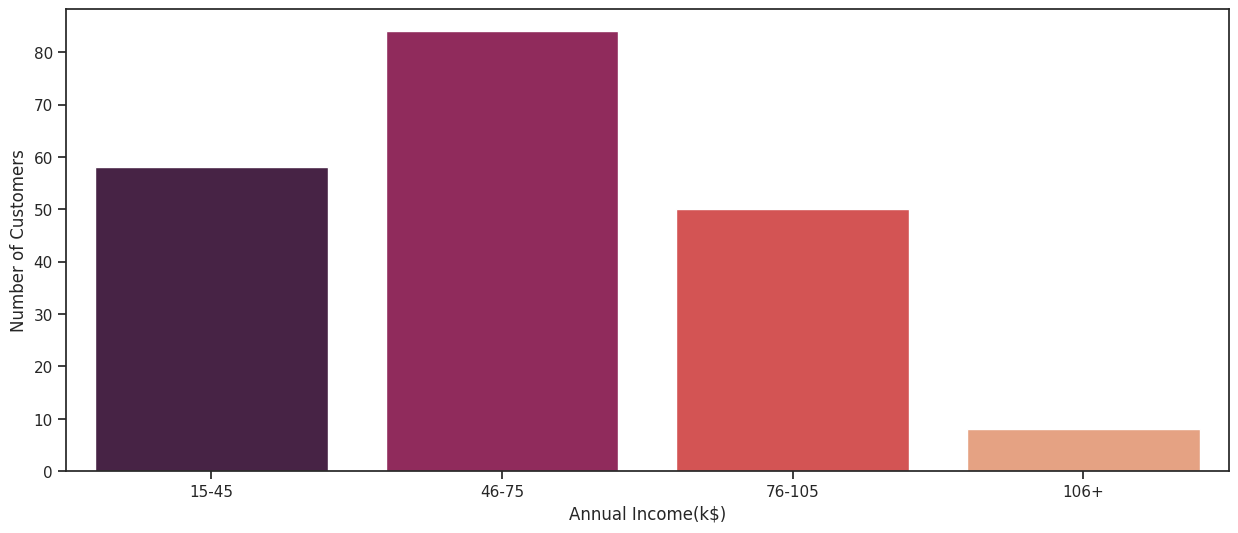

In [ ]:
ai_15_45=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=1)&(cust_data["Annual Income (k$)"]<=45)]
ai_46_75=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=46)&(cust_data["Annual Income (k$)"]<=75)]
ai_76_105=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>=76)&(cust_data["Annual Income (k$)"]<=105)]
ai_105_above=cust_data["Annual Income (k$)"][(cust_data["Annual Income (k$)"]>105)]
ai_x=["15-45","46-75","76-105","106+"]
ai_y=[len(ai_15_45.values),len(ai_46_75.values),len(ai_76_105.values),len(ai_105_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ai_x,y=ai_y,palette="rocket")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Number of Customers")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

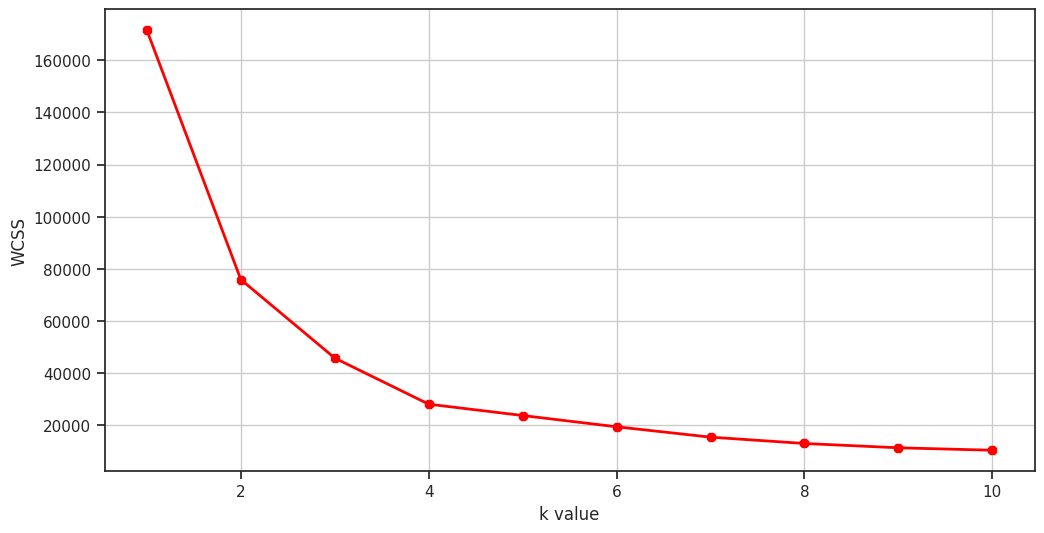

In [ ]:
#Elbow method to determine the optimum number of clusters
x1=cust_data.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init=("k-means++"))
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")

In [ ]:
#The optimum number of clusters is 4
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 3 3 1 0 3 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1
 0 1 0 2 0 2 3 1 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 2 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 2 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


Text(0, 0.5, 'Spending Score')

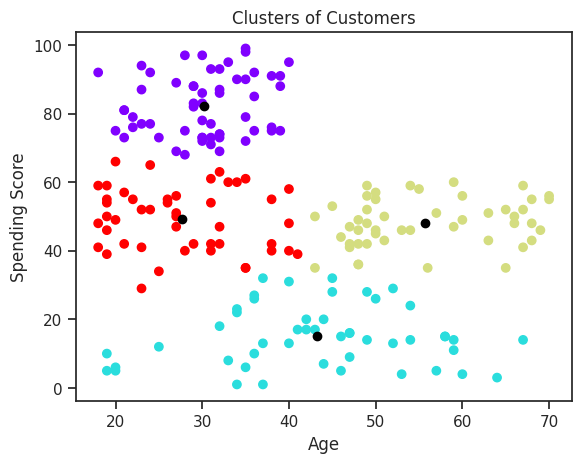

In [ ]:
plt.scatter(x1[:,0], x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel("Age")
plt.ylabel("Spending Score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

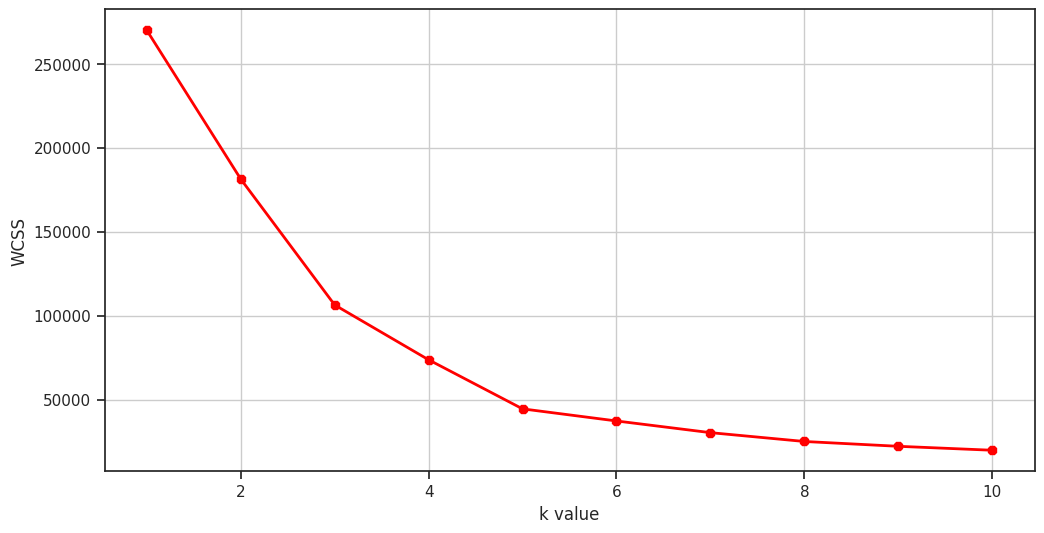

In [ ]:
#Cluisters based on annual income and Spending score
x2=cust_data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init=("k-means++"))
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")

In [ ]:
#The optimum number of clusters is 5
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 3 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


Text(0, 0.5, 'Spending Score')

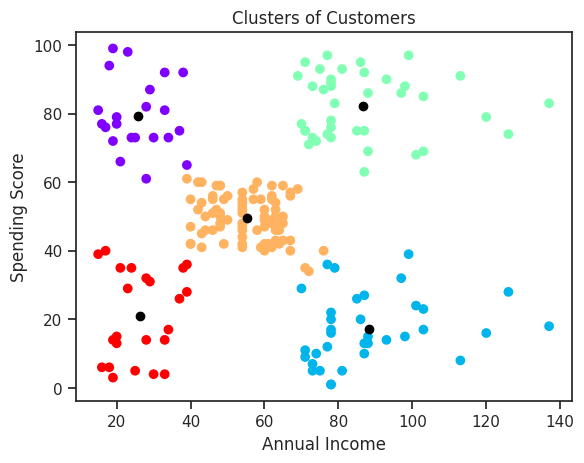

In [ ]:
plt.scatter(x2[:,0], x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

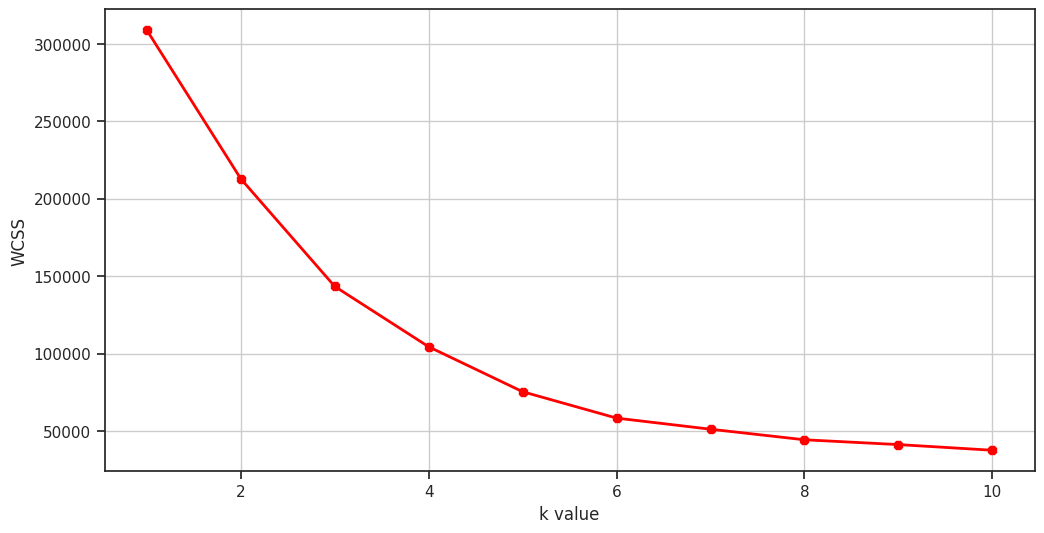

In [ ]:
#Clusters based on Age,annual income and spending score
x3=cust_data.iloc[:,2:]
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init=("k-means++"))
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("k value")
plt.ylabel("WCSS")


In [ ]:
#The optimum number of clusters is 5
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 4 1 3 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 3 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Spending Score(1-100)')

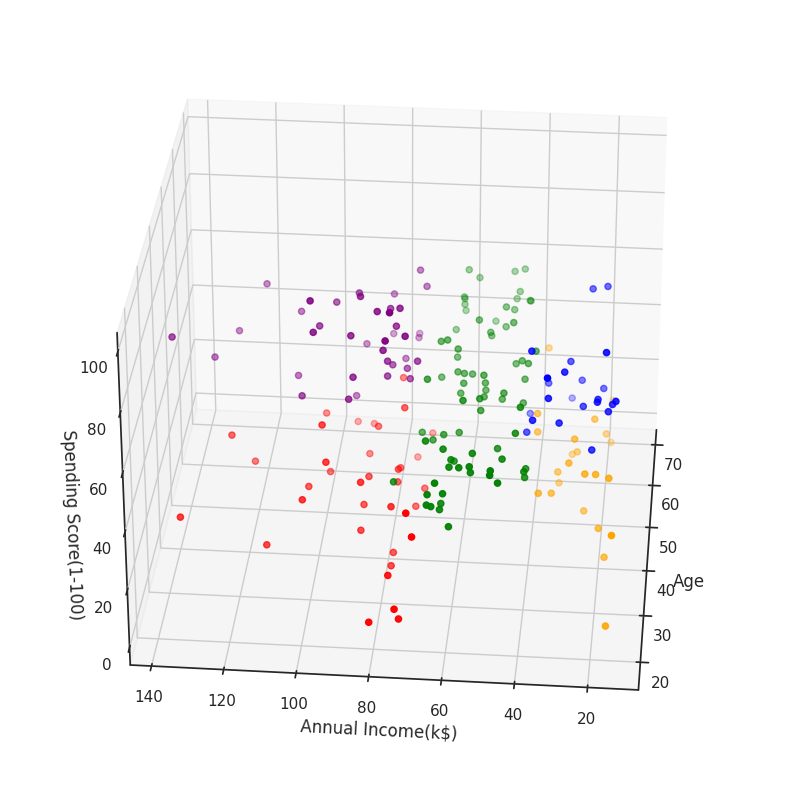

In [ ]:
#plots
clusters=kmeans.fit_predict(x3)
cust_data["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(cust_data.Age[cust_data.label==0],cust_data["Annual Income (k$)"][cust_data.label==0],cust_data["Spending Score (1-100)"][cust_data.label==0],c='blue')
ax.scatter(cust_data.Age[cust_data.label==1],cust_data["Annual Income (k$)"][cust_data.label==1],cust_data["Spending Score (1-100)"][cust_data.label==1],c='red')
ax.scatter(cust_data.Age[cust_data.label==2],cust_data["Annual Income (k$)"][cust_data.label==2],cust_data["Spending Score (1-100)"][cust_data.label==2],c='green')
ax.scatter(cust_data.Age[cust_data.label==3],cust_data["Annual Income (k$)"][cust_data.label==3],cust_data["Spending Score (1-100)"][cust_data.label==3],c='orange')
ax.scatter(cust_data.Age[cust_data.label==4],cust_data["Annual Income (k$)"][cust_data.label==4],cust_data["Spending Score (1-100)"][cust_data.label==4],c='purple')
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income(k$)")
ax.set_zlabel("Spending Score(1-100)")